## Q4: Climate

Download the data file of global surface air temperature averages from here: https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt This data comes from: https://data.giss.nasa.gov/gistemp/graphs/

(Don't ask, of course you can download data straight from python! The library is called urllib)

There are 3 columns here: the year, the temperature change, and a smoothed representation of the temperature change.

* Read in this data using np.loadtxt().
* Plot as a line the smoothed representation of the temperature changes.
* Plot as points the temperature change (no smoothing). Color the points blue if they are < 0 and color them red if they are >= 0

You might find the numpy where() function useful.

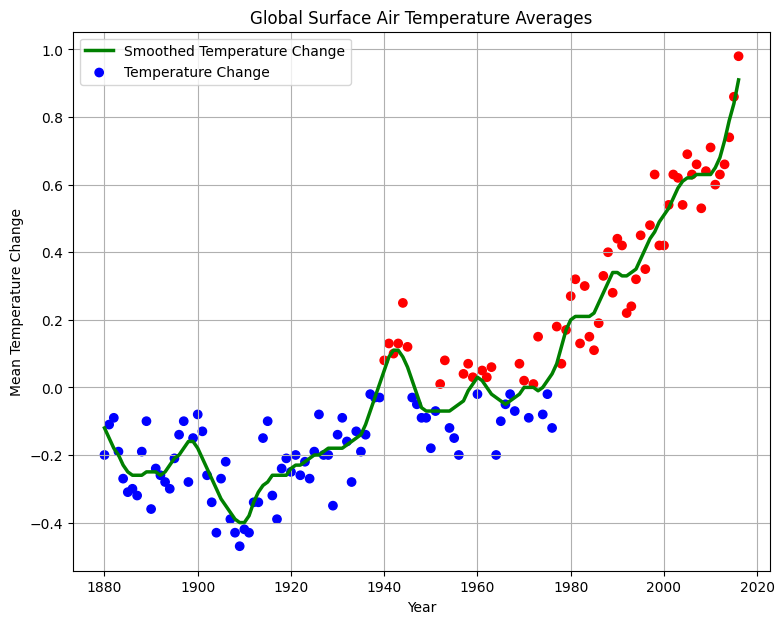

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import urllib

# Download the data file
url = "https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt"
data = urllib.request.urlopen(url)

# Read the data
year, temp_change, smoothed_temp_change = np.loadtxt(data, unpack=True)

fig = plt.figure(figsize=(9,7), dpi=100)
plt.plot(year, smoothed_temp_change, label='Smoothed Temperature Change', color='green', linewidth=2.5)
plt.scatter(year, temp_change, label='Temperature Change', color=np.where(temp_change < 0, 'blue', 'red'))
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Mean Temperature Change')
plt.title('Global Surface Air Temperature Averages')
plt.grid(True)
plt.show()


## Q6: Mandelbrot set

The [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) is defined such that $z_{k+1} = z_k^2 + c$
remains bounded, which is usually taken as $|z_{k+1}| <= 2$
where $c$ is a complex number and we start with $z_0 = 0$

We want to consider a range of $c$, as complex numbers $c = x + iy$,
where $-2 < x < 2$ and $-2 < y < 2$.

For each $c$, identify its position on a Cartesian grid as $(x,y)$ and 
assign a value $N$ that is the number of iterations, $k$, required for $|z_{k+1}|$ to become greater than $2$.

The plot of this function is called the Mandelbrot set.

Here's a simple implementation that just does a fixed number of iterations and then colors points in Z depending on whether they satisfy $|z| \le 2$.  

Your task is to extend this to record the number of iterations it takes for each point in the Z-plane to violate that constraint,
and then plot that data -- it will show more structure


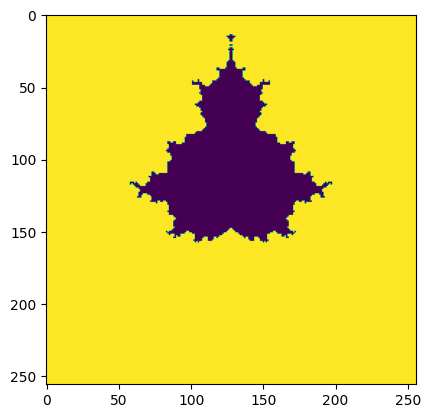

In [3]:
#given by exercise

N = 256
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)
xv, yv = np.meshgrid(x, y, indexing="ij")
c = xv + 1j*y
z = np.zeros((N, N), dtype=np.complex128)
for i in range(10):
    z = z**2 + c
    
m = np.ones((N, N))
m[np.abs(z) <= 2] = 0.0

fig, ax = plt.subplots()
ax.imshow(m)




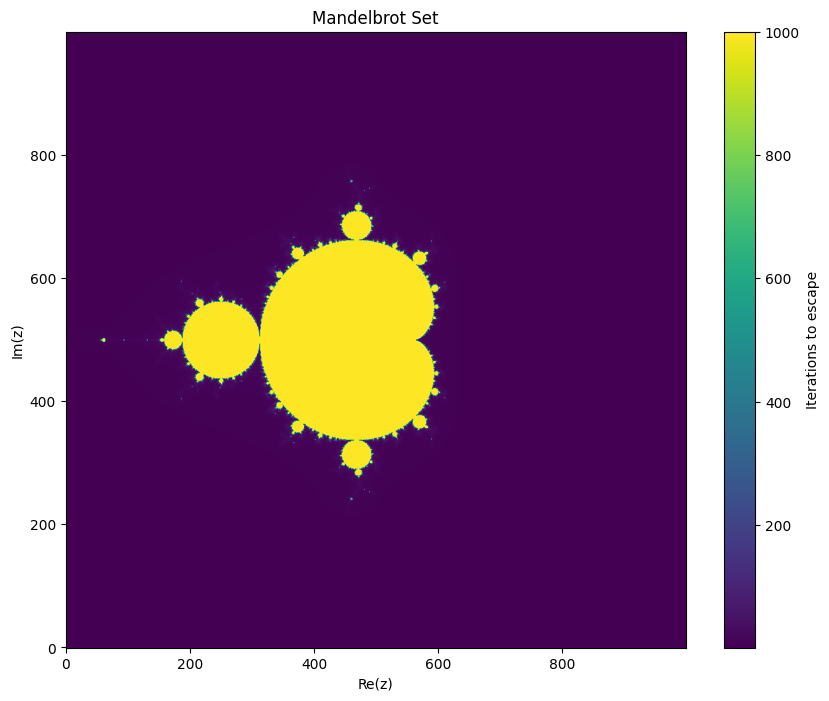

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define function to check if a point is in the Mandelbrot set
def mandelbrot(c, max_iter):
    z = 0
    for i in range(max_iter):
        if abs(z) > 2:
            return i  # Return number of iterations to escape
        z = z*z + c
    return max_iter  # Return max_iter if it doesn't escape

# Define range for real and imaginary parts
real_range = np.linspace(-2, 2, 1000)
imag_range = np.linspace(-2, 2, 1000)

# Set maximum number of iterations
max_iter = 1000

# Create meshgrid of complex numbers
X, Y = np.meshgrid(real_range, imag_range)
Z = X + 1j*Y

# Calculate number of iterations for each point
iterations = np.frompyfunc(lambda x: mandelbrot(x, max_iter), 1, 1)(Z)

# Plot Mandelbrot set
fig = plt.figure(figsize=(10, 8), dpi=100)
plt.imshow(iterations.astype(int), cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Iterations to escape')
plt.title('Mandelbrot Set')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.show()
